# Cancer Classification

In [1]:
import jax.numpy as np
import jax
from matplotlib import pyplot as plt
import pandas as pd
from jax.lib import xla_bridge
import ADAMLL as ada
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import  train_test_split 
from sklearn.preprocessing import StandardScaler
import seaborn as sns
print("jax backend {}".format(xla_bridge.get_backend().platform))

key = jax.random.PRNGKey(2024)

jax backend gpu


## Data

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data,cancer.target,random_state=0)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = np.asarray(X_train)
X_test = np.asarray(X_test)
y_train = np.asarray(y_train).reshape(-1,1)
y_test = np.asarray(y_test).reshape(-1,1)

print("X_train shape {}".format(X_train.shape))
print("y_train shape {}".format(y_train.shape))
print("X_test shape {}".format(X_test.shape))
print("y_test shape {}".format(y_test.shape))





X_train shape (426, 30)
y_train shape (426, 1)
X_test shape (143, 30)
y_test shape (143, 1)


### Plot data


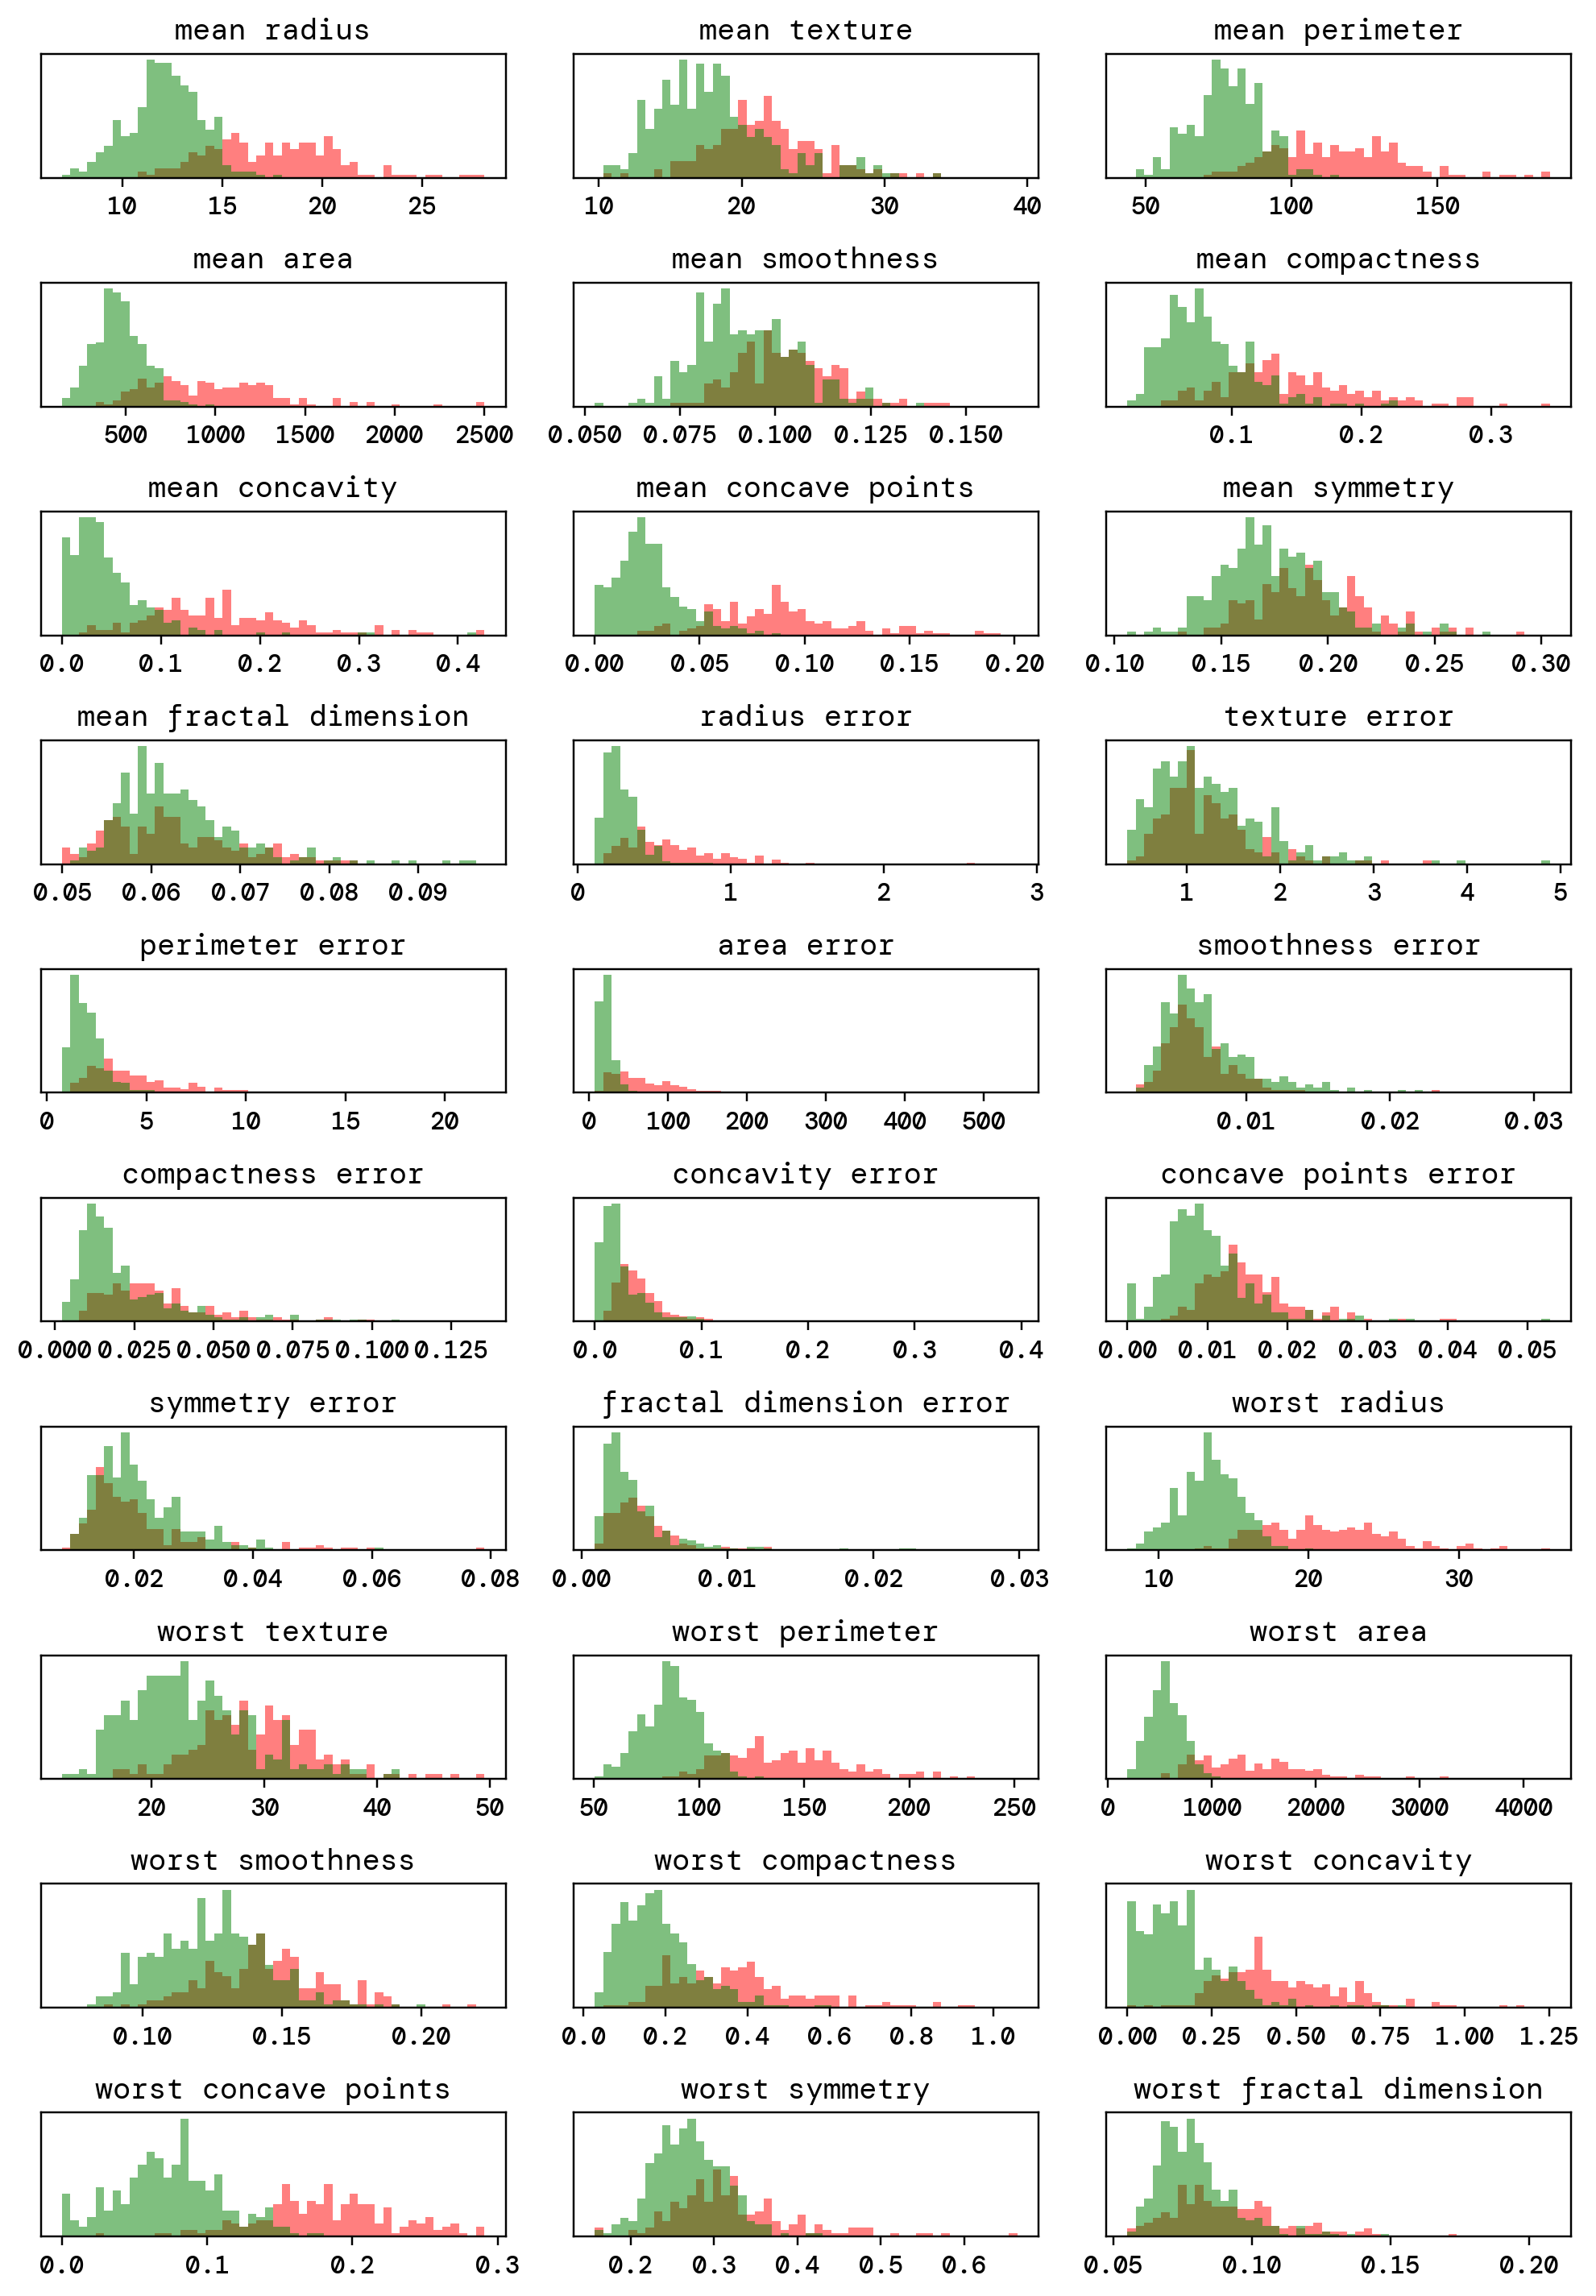

In [13]:
# plot every feature histogram



fig, axes = plt.subplots(10,3, figsize=(9, 13))
malignant = cancer.data[cancer.target==0]
benign = cancer.data[cancer.target==1]
ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color='r', alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color='g', alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
fig.tight_layout()
plt.savefig("../runsAndFigures/feature_histogram.png",bbox_inches='tight')
plt.show()

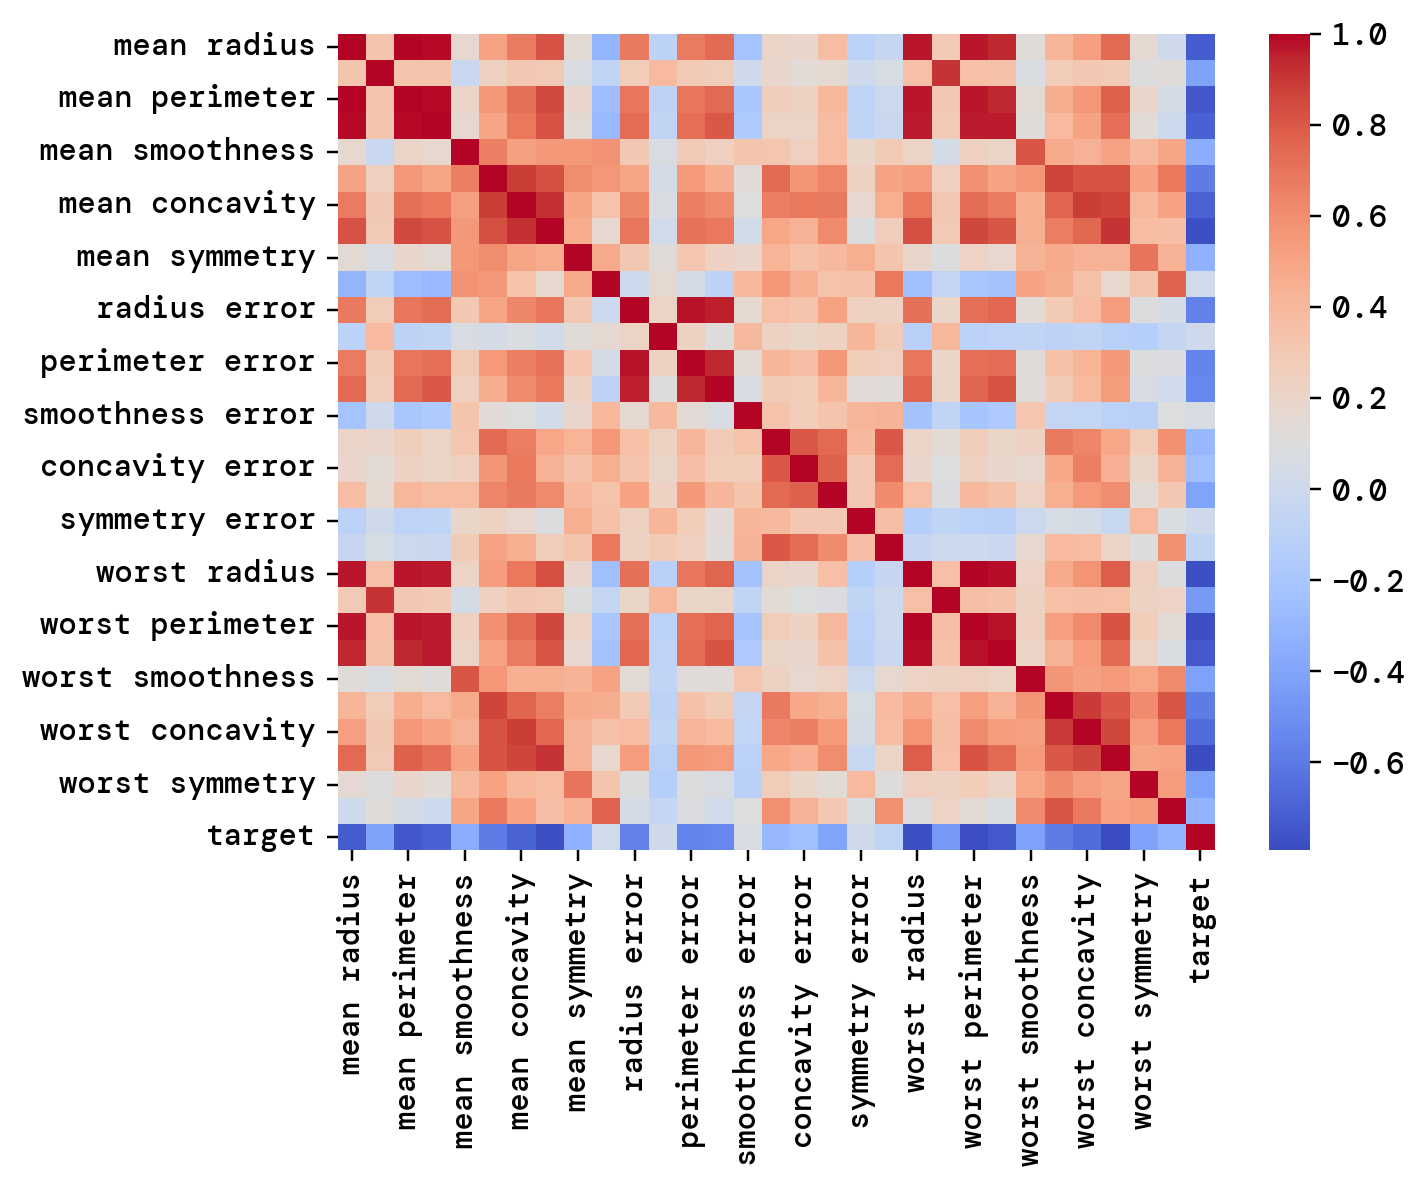

In [7]:
# correlation matrix
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
cancer_df["target"] = cancer.target
corr = cancer_df.corr()
plt.figure()
sns.heatmap(corr,cmap="coolwarm")
plt.savefig("../runsAndFigures/feature_correlation.png",bbox_inches='tight')
plt.show()

## Feature Selection

In [ ]:

#Select features relevant to classification (texture,perimeter,compactness and symmetery) 
#and add to input matrix



# temp1=np.reshape(x[:,1],(len(x[:,1]),1))
# temp2=np.reshape(x[:,2],(len(x[:,2]),1))
# X=np.hstack((temp1,temp2))      
# temp=np.reshape(x[:,5],(len(x[:,5]),1))
# X=np.hstack((X,temp))       
# temp=np.reshape(x[:,8],(len(x[:,8]),1))
# X=np.hstack((X,temp))       

# X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2) #Split data into training and test sets

# y_train=to_categorical(y_train)     #Convert labels to categorical when using categorical cross entropy
# y_test=to_categorical(y_test)

# del temp1,temp2,temp

# Analysis

Training stopped after 299 epochs                                     

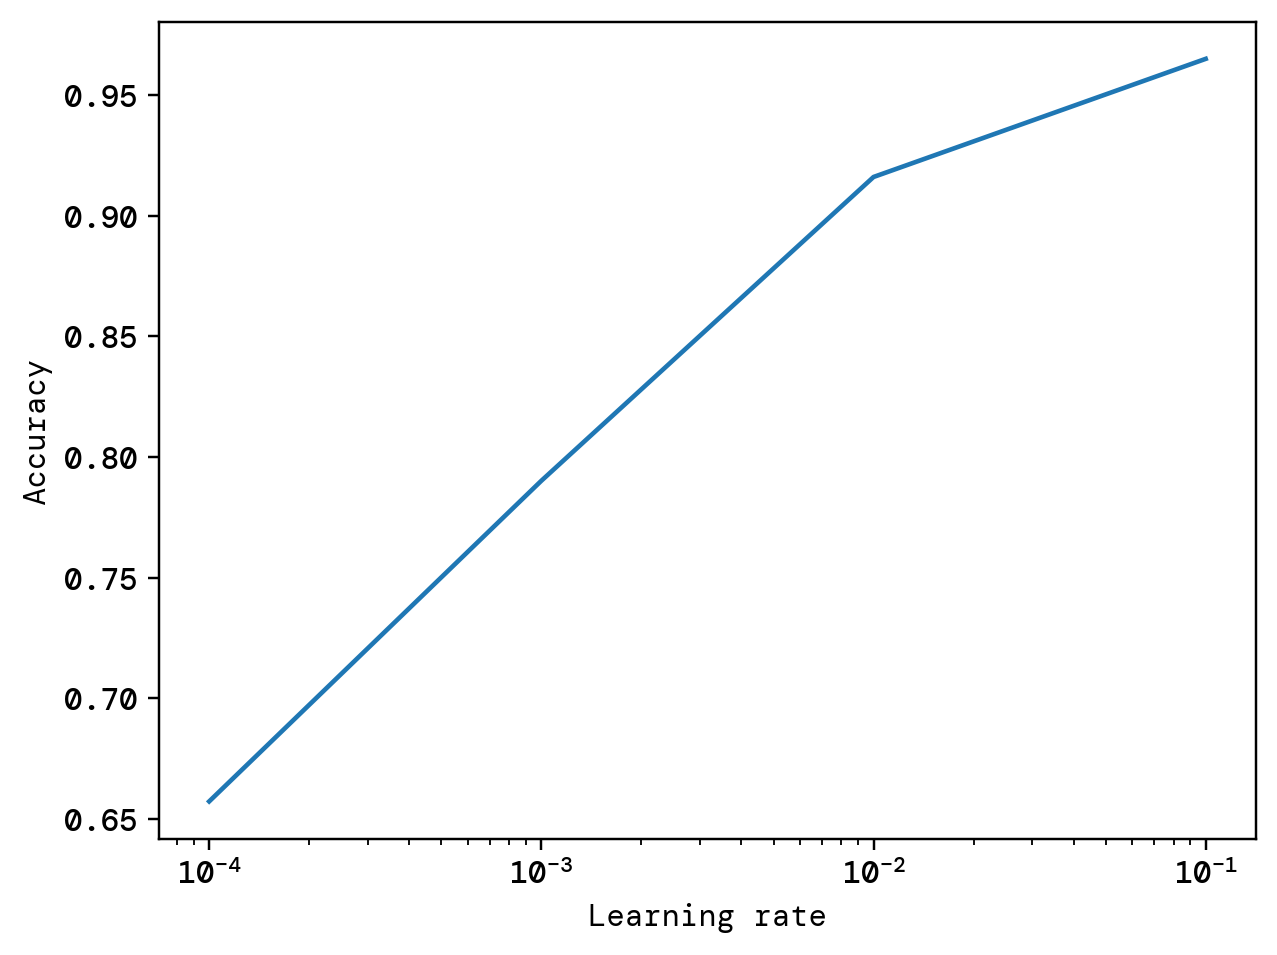

TypeError: show() got an unexpected keyword argument 'dpi'

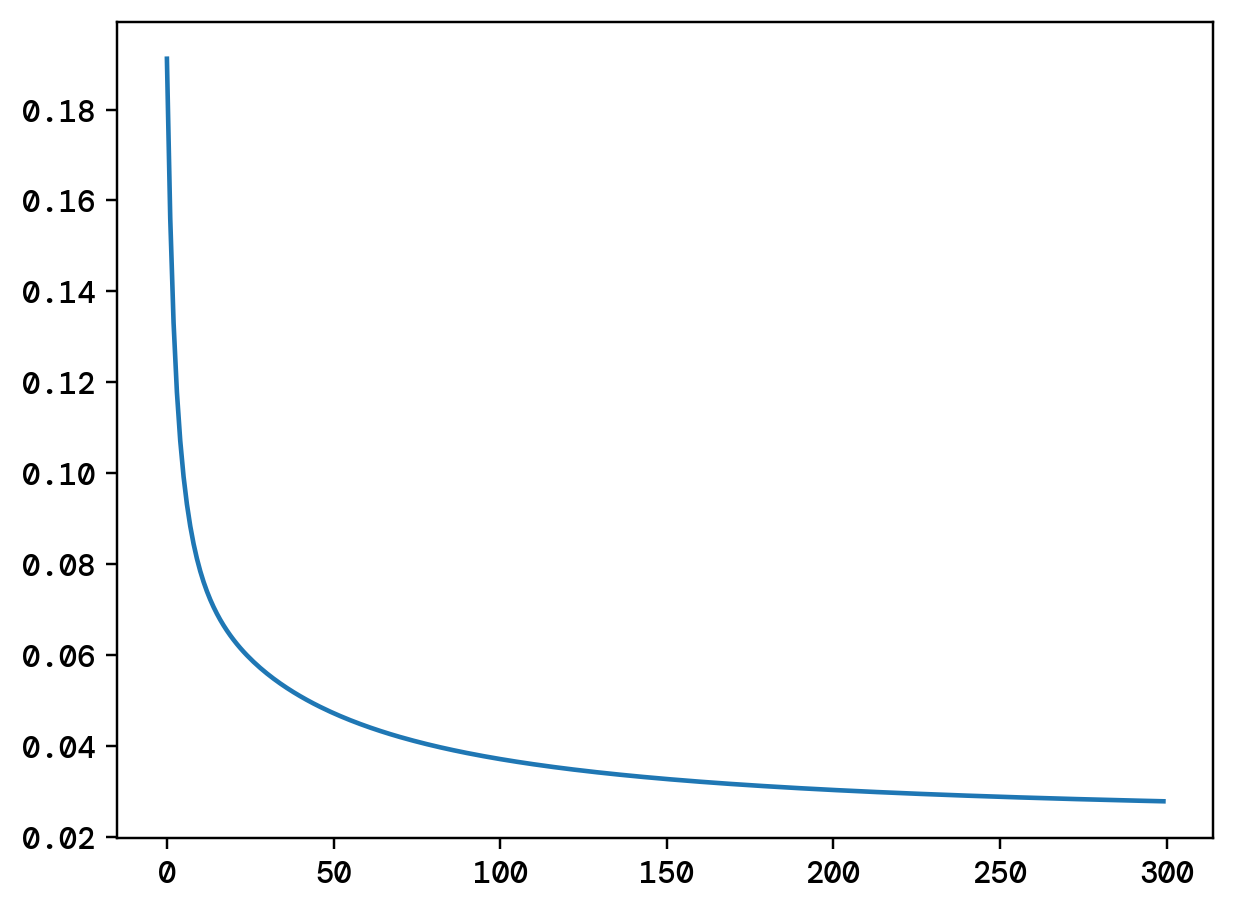

In [18]:

etas = [0.1, 0.01, 0.001, 0.0001]
accuracy = []
loss = []
for eta in etas:
    #The NN has a single output node, the number of input nodes matches the number of features in the data
    #the NN becomes a logistic regression model
    network = ada.NN.Model(architecture=[[1, ada.activations.sigmoid]], eta=eta, epochs=300, optimizer='sgd', loss=ada.CE)
    
    #fitting the data and finding the accuracy
    l,_ = network.fit(X_train,y_train, X_test, y_test)
    accuracy.append(ada.accuracy(network.classify(X_test), y_test))
    loss.append(l)

plt.figure()
plt.plot(etas, accuracy)
plt.xlabel('Learning rate')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.show()

plt.figure()
plt.plot(loss[0], label='eta=0.1')
plt.show()



## Comparing with TensorFlow

The content of the breast cancer dataset is:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
-------------------------
inputs =  (569, 30)
outputs =  (569,)
labels =  (30,)


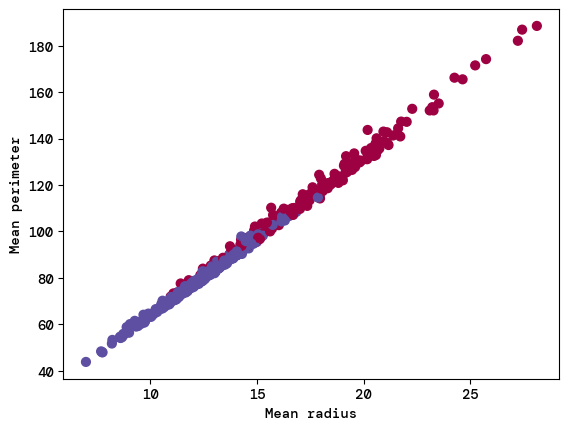

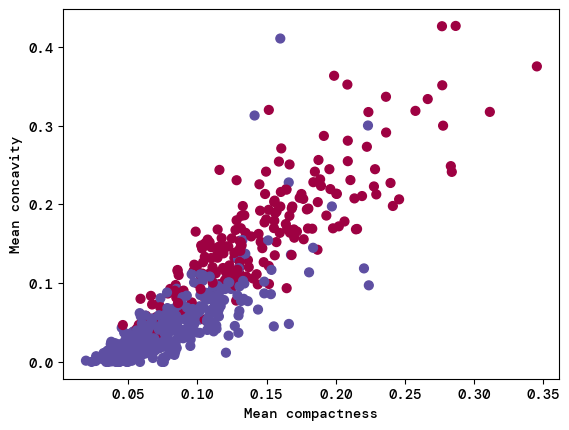

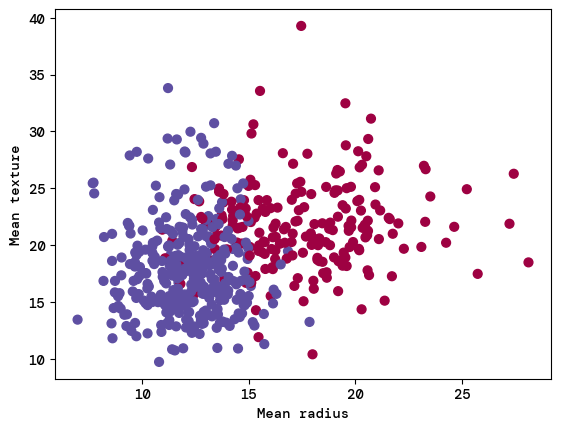

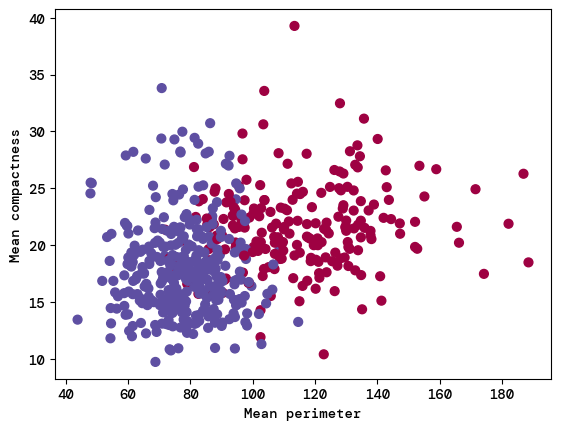

Epoch 1/100
6/6 [==============================] - 0s 4ms/step - loss: 1.2930 - accuracy: 0.6289
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7000 - accuracy: 0.6289
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.7180 - accuracy: 0.5273
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6998 - accuracy: 0.6289
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.6289
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.6289
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6960 - accuracy: 0.6289
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.6289
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.6289
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.6289
Epoch 11/100
6/6 [===========

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5703
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7061 - accuracy: 0.6289
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.6289
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.7023 - accuracy: 0.6289
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7008 - accuracy: 0.6289
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6988 - accuracy: 0.6289
Epoch 7/100
6/6 [==============================] - 0s 6ms/step - loss: 0.6975 - accuracy: 0.6289
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.6289
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.6289
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.6289
Epoch 11/100
6/6 [===========

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 2.2528 - accuracy: 0.6289
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 0.7393 - accuracy: 0.6289
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7175 - accuracy: 0.6289
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7161 - accuracy: 0.6289
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7130 - accuracy: 0.6289
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7120 - accuracy: 0.6250
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.7096 - accuracy: 0.6289
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7081 - accuracy: 0.6289
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7069 - accuracy: 0.6289
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7059 - accuracy: 0.6543
Epoch 11/100
6/6 [===========

Epoch 1/100
6/6 [==============================] - 0s 4ms/step - loss: 7.3750 - accuracy: 0.5117
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0101 - accuracy: 0.4805
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8497 - accuracy: 0.5391
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8513 - accuracy: 0.5000
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8451 - accuracy: 0.5742
Epoch 6/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8459 - accuracy: 0.5625
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8464 - accuracy: 0.6289
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8442 - accuracy: 0.5820
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 0.8451 - accuracy: 0.4688
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8367 - accuracy: 0.5332
Epoch 11/100
6/6 [===========

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 8.1213 - accuracy: 0.4844
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 1.1267 - accuracy: 0.4434
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8634 - accuracy: 0.5527
Epoch 4/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8332 - accuracy: 0.5312
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8598 - accuracy: 0.5762
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8160 - accuracy: 0.6367
Epoch 7/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8174 - accuracy: 0.5801
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8093 - accuracy: 0.6035
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8190 - accuracy: 0.6309
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 0.8129 - accuracy: 0.6621
Epoch 11/100
6/6 [===========

Epoch 1/100
6/6 [==============================] - 0s 4ms/step - loss: 7.1096 - accuracy: 0.5312
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 1.0583 - accuracy: 0.5117
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8322 - accuracy: 0.6172
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8429 - accuracy: 0.5215
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8165 - accuracy: 0.5742
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8268 - accuracy: 0.5742
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 0.8299 - accuracy: 0.6113
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7816 - accuracy: 0.6406
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8566 - accuracy: 0.4980
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.7911 - accuracy: 0.6016
Epoch 11/100
6/6 [===========

Epoch 1/100
6/6 [==============================] - 0s 3ms/step - loss: 11.9276 - accuracy: 0.5078
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 1.7860 - accuracy: 0.6328
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 1.6948 - accuracy: 0.6543
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 1.6939 - accuracy: 0.6113
Epoch 5/100
6/6 [==============================] - 0s 3ms/step - loss: 1.8000 - accuracy: 0.6191
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 1.7208 - accuracy: 0.5879
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 1.6764 - accuracy: 0.6426
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 1.6574 - accuracy: 0.6641
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 1.6658 - accuracy: 0.6680
Epoch 10/100
6/6 [==============================] - 0s 6ms/step - loss: 1.6601 - accuracy: 0.6445
Epoch 11/100
6/6 [==========

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 12.7286 - accuracy: 0.4492
Epoch 2/100
6/6 [==============================] - 0s 3ms/step - loss: 1.7400 - accuracy: 0.5918
Epoch 3/100
6/6 [==============================] - 0s 3ms/step - loss: 1.7280 - accuracy: 0.5703
Epoch 4/100
6/6 [==============================] - 0s 3ms/step - loss: 1.6862 - accuracy: 0.6562
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 1.7323 - accuracy: 0.6152
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 1.7151 - accuracy: 0.5957
Epoch 7/100
6/6 [==============================] - 0s 3ms/step - loss: 1.6889 - accuracy: 0.6133
Epoch 8/100
6/6 [==============================] - 0s 3ms/step - loss: 1.6718 - accuracy: 0.6387
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 1.6799 - accuracy: 0.6484
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 1.6628 - accuracy: 0.6719
Epoch 11/100
6/6 [==========

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 27.1348 - accuracy: 0.4805
Epoch 2/100
6/6 [==============================] - 0s 2ms/step - loss: 1.7484 - accuracy: 0.6055
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 1.7056 - accuracy: 0.6270
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 1.7208 - accuracy: 0.6074
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 1.6967 - accuracy: 0.6211
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 1.7115 - accuracy: 0.5938
Epoch 7/100
6/6 [==============================] - 0s 7ms/step - loss: 1.7074 - accuracy: 0.6484
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 1.6633 - accuracy: 0.6621
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 1.6636 - accuracy: 0.6660
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 1.7841 - accuracy: 0.5566
Epoch 11/100
6/6 [=========

Epoch 1/100
6/6 [==============================] - 0s 14ms/step - loss: 20.3708 - accuracy: 0.5547
Epoch 2/100
6/6 [==============================] - 0s 11ms/step - loss: 10.8672 - accuracy: 0.5195
Epoch 3/100
6/6 [==============================] - 0s 52ms/step - loss: 10.6754 - accuracy: 0.6172
Epoch 4/100
6/6 [==============================] - 0s 25ms/step - loss: 10.7824 - accuracy: 0.5566
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 10.6188 - accuracy: 0.6484
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 10.5656 - accuracy: 0.6797
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 10.5665 - accuracy: 0.6172
Epoch 8/100
6/6 [==============================] - 0s 8ms/step - loss: 10.5343 - accuracy: 0.6484
Epoch 9/100
6/6 [==============================] - 0s 52ms/step - loss: 10.5262 - accuracy: 0.6172
Epoch 10/100
6/6 [==============================] - 0s 31ms/step - loss: 10.4904 - accuracy: 0.6152
Epoch 11/100


Epoch 1/100
6/6 [==============================] - 0s 11ms/step - loss: 19.4887 - accuracy: 0.4805
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 10.8830 - accuracy: 0.5312
Epoch 3/100
6/6 [==============================] - 0s 11ms/step - loss: 10.7172 - accuracy: 0.6582
Epoch 4/100
6/6 [==============================] - 0s 31ms/step - loss: 10.6498 - accuracy: 0.6523
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 10.6030 - accuracy: 0.6543
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 10.5711 - accuracy: 0.6523
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 10.5650 - accuracy: 0.6309
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 10.5260 - accuracy: 0.6230
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 10.5634 - accuracy: 0.6133
Epoch 10/100
6/6 [==============================] - 0s 9ms/step - loss: 10.4694 - accuracy: 0.6523
Epoch 11/100
6

Epoch 1/100
6/6 [==============================] - 0s 11ms/step - loss: 24.4594 - accuracy: 0.5117
Epoch 2/100
6/6 [==============================] - 0s 10ms/step - loss: 10.8493 - accuracy: 0.5371
Epoch 3/100
6/6 [==============================] - 0s 9ms/step - loss: 10.7605 - accuracy: 0.5723
Epoch 4/100
6/6 [==============================] - 0s 37ms/step - loss: 10.6564 - accuracy: 0.5977
Epoch 5/100
6/6 [==============================] - 0s 10ms/step - loss: 10.6274 - accuracy: 0.5898
Epoch 6/100
6/6 [==============================] - 0s 12ms/step - loss: 10.5865 - accuracy: 0.6211
Epoch 7/100
6/6 [==============================] - 0s 9ms/step - loss: 10.5565 - accuracy: 0.6328
Epoch 8/100
6/6 [==============================] - 0s 13ms/step - loss: 10.5643 - accuracy: 0.6152
Epoch 9/100
6/6 [==============================] - 0s 10ms/step - loss: 10.5074 - accuracy: 0.6328
Epoch 10/100
6/6 [==============================] - 0s 10ms/step - loss: 10.4867 - accuracy: 0.6113
Epoch 11/10

KeyboardInterrupt: 

In [6]:
#Copied from the fys-stk4155 repository: https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/week42.html#the-breast-cancer-data-now-with-keras

import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential      #This allows appending layers to existing models
from tensorflow.keras.layers import Dense           #This allows defining the characteristics of a particular layer
from tensorflow.keras import optimizers             #This allows using whichever optimiser we want (sgd,adam,RMSprop)
from tensorflow.keras import regularizers           #This allows using whichever regularizer we want (l1,l2,l1_l2)
from tensorflow.keras.utils import to_categorical   #This allows using categorical cross entropy as the cost function
import pickle
import os 



# Define tunable parameters"

eta=np.logspace(-3,-1,3)                    #Define vector of learning rates (parameter to SGD optimiser)
lamda=0.01                                  #Define hyperparameter
n_layers=2                                  #Define number of hidden layers in the model
n_neuron=np.logspace(0,3,4,dtype=int)       #Define number of neurons per layer
epochs=100                                   #Number of reiterations over the input data
batch_size=100                              #Number of samples per gradient update



"""Define function to return Deep Neural Network model"""

def NN_model(inputsize,n_layers,n_neuron,eta,lamda):
    model=Sequential()      
    for i in range(n_layers):       #Run loop to add hidden layers to the model
        if (i==0):                  #First layer requires input dimensions
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda),input_dim=inputsize))
        else:                       #Subsequent layers are capable of automatic shape inferencing
            model.add(Dense(n_neuron,activation='relu',kernel_regularizer=regularizers.l2(lamda)))
    model.add(Dense(2,activation='softmax'))  #2 outputs - ordered and disordered (softmax for prob)
    sgd=optimizers.SGD(lr=eta)
    model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
    return model

    
Train_accuracy=np.zeros((len(n_neuron),len(eta)))      #Define matrices to store accuracy scores as a function
Test_accuracy=np.zeros((len(n_neuron),len(eta)))       #of learning rate and number of hidden neurons for 

for i in range(len(n_neuron)):     #run loops over hidden neurons and learning rates to calculate 
    for j in range(len(eta)):      #accuracy scores 
        DNN_model=NN_model(X_train.shape[1],n_layers,n_neuron[i],eta[j],lamda)
        DNN_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,verbose=1)
        Train_accuracy[i,j]=DNN_model.evaluate(X_train,y_train)[1]
        Test_accuracy[i,j]=DNN_model.evaluate(X_test,y_test)[1]
               

def plot_data(x,y,data,title=None):

    # plot results
    fontsize=16


    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(data, interpolation='nearest', vmin=0, vmax=1)
    
    cbar=fig.colorbar(cax)
    cbar.ax.set_ylabel('accuracy (%)',rotation=90,fontsize=fontsize)
    cbar.set_ticks([0,.2,.4,0.6,0.8,1.0])
    cbar.set_ticklabels(['0%','20%','40%','60%','80%','100%'])

    # put text on matrix elements
    for i, x_val in enumerate(np.arange(len(x))):
        for j, y_val in enumerate(np.arange(len(y))):
            c = "${0:.1f}\\%$".format( 100*data[j,i])  
            ax.text(x_val, y_val, c, va='center', ha='center')

    # convert axis vaues to to string labels
    x=[str(i) for i in x]
    y=[str(i) for i in y]


    ax.set_xticklabels(['']+x)
    ax.set_yticklabels(['']+y)

    ax.set_xlabel('$\\mathrm{learning\\ rate}$',fontsize=fontsize)
    ax.set_ylabel('$\\mathrm{hidden\\ neurons}$',fontsize=fontsize)
    if title is not None:
        ax.set_title(title)

    plt.tight_layout()

    plt.show()
    
plot_data(eta,n_neuron,Train_accuracy, 'training')
plot_data(eta,n_neuron,Test_accuracy, 'testing')

## Comparing with SKLearn

In [ ]:
#Copied from the fys-stk4155 repository: https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter4.html
from sklearn.linear_model import LogisticRegression


logreg = LogisticRegression(solver='lbfgs')
logreg.fit(X_train, y_train)
print("Test set accuracy with Logistic Regression: {:.2f}".format(logreg.score(X_test,y_test)))
#now scale the data
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Logistic Regression
logreg.fit(X_train_scaled, y_train)
print("Test set accuracy Logistic Regression with scaled data: {:.2f}".format(logreg.score(X_test_scaled,y_test)))